In [2]:
from diffusers import DiffusionPipeline
import torch

/workspace/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
STABLE_DIFFUSION_MODEL_ID = 'runwayml/stable-diffusion-v1-5'
pipeline = DiffusionPipeline.from_pretrained(STABLE_DIFFUSION_MODEL_ID).to('cuda') # initialize generic pipeline

/workspace/venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]


In [4]:
pipeline.load_lora_weights('../sd-model-finetuned-lora/', weight_name='pytorch_lora_weights.safetensors')

In [7]:
prompt = 'a black t-shirt'
lora_scale = 0.9
image = pipeline(prompt, num_inference_steps=50, cross_attention_kwargs={'scale': lora_scale}, generator=torch.manual_seed(42)).images[0]

100%|██████████| 50/50 [00:22<00:00,  2.24it/s]


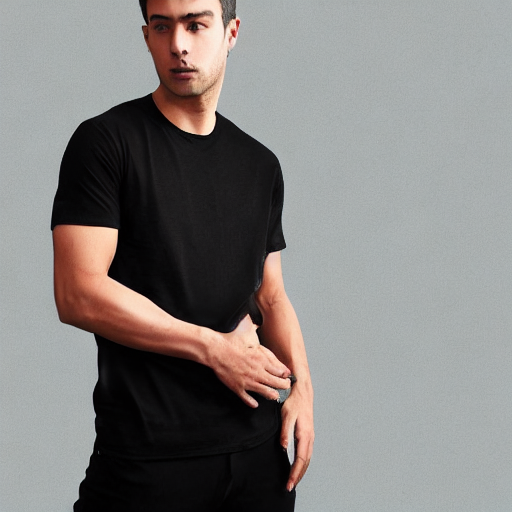

In [8]:
image